In [128]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import glob
from os import path
import itertools
import requests
from io import StringIO
from pandas import DataFrame
import requests
from time import sleep
from matplotlib.font_manager import FontProperties
import concurrent.futures
from matplotlib.ticker import ScalarFormatter, LogFormatter, LogFormatterExponent, LogFormatterMathtext
import datetime
#FixedOrderFormatter

In [96]:
fontP = FontProperties()
fontP.set_size('small')

In [97]:
%matplotlib inline

In [4]:
def get_word(word):
  found = False
  while not found:
    req = requests.get(params={"response_type": "json", "keyword": word},
                       url="http://chronicle.nytlabs.com/graph")
    if req.status_code == requests.codes.ok:
      df = pd.DataFrame.from_records(req.json())
      term = word.strip().replace(" ", "_")
      df = df.rename(columns={"total_articles_published": "Total", "article_matches": term})
      database = df[["Total", term, "year"]]
      return database
    else:
      print("We could not get the word '{}'\nsleeping for .1s ...".format(word))
      sleep(.1)

In [5]:
def get_words(words):
  for i, word in enumerate(words):
    df = get_word(word)
    if i == 0:
      database = df
      continue
    df.drop("Total", 1, inplace=True)
    database = pd.merge(database, df, on="year", how="outer")
  database.set_index("year", inplace=True)
  values = database.values
  values = (database.values.T / database.Total.values).T
  values[:, 0] = database.Total.values
  database_norm = pd.DataFrame(data=values, columns=database.columns, index=database.index)
  database_norm.drop("Total", 1, inplace=True)
  return database_norm

In [6]:
def get_words_parallel(words):
    with concurrent.futures.ProcessPoolExecutor(max_workers=12) as executor:
        for i, (word, df) in enumerate(zip(words, executor.map(get_word, words))):
            if i == 0:
              database = df
              continue
            df.drop("Total", 1, inplace=True)
            database = pd.merge(database, df, on="year", how="outer")   
        database.set_index("year", inplace=True)
        values = database.values
        values = (database.values.T / database.Total.values).T
        values[:, 0] = database.Total.values
        database_norm = pd.DataFrame(data=values, columns=database.columns, index=database.index)
        database_norm.drop("Total", 1, inplace=True)
        return database_norm

In [ ]:
#def sum_columns(dataframe, column_names):
    #column_names_normalized = [x.replace(" ", "_") for x in column_names]
    #return dataframe[column_names_normalized].sum(axis=1)

In [36]:
g1  = ["monocultural", "mono-cultural", "mono cultural", "monoculturals", "mono-culturals", "mono culturals"]
g2 = [ "monoracial", "mono-racial", "mono racial", "monoracials", "mono-racials", "mono racials"]
g3 = ["monoethnic", "mono-ethnic", "mono ethnic", "monoethnics", "mono-ethnics", "mono ethnics"]
g4 = ["bicultural", "bi-cultural", "bi cultural", "biculturals", "bi-culturals", "bi culturals"]
g5 = ["biracial", "bi-racial", "bi racial", "biracials", "bi-racials", "bi racials"]
g6 = ["biethnic", "bi-ethnic", "bi ethnic", "biethnics", "bi-ethnics", "bi ethnics"]
g7 = ["interracial", "inter-racial", "inter racial", "interracials", "inter-racials", "inter racials"]
g8 = ["multiracial", "multi-racial", "multi racial", "multiracials", "multi-racials", "multi racials"]
g9 = ["multiethnic", "multi-ethnic", "multi ethnic", "multiethnics", "multi-ethnics", "multi ethnics"]
g10 = ["multicultural", "multi-cultural", "multi cultural", "multiculturals", "multi-culturals", "multi culturals"]
g11 = ["culturalpluralism", "cultural-pluralism", "cultural pluralism", "culturalpluralisms",
      "cultural-pluralisms", "cultural pluralisms"]
g12 = ["polyculturalism", "poly-culturalism", "poly culturalism", "polyculturalisms",
       "poly-culturalisms", "poly culturalisms"]
g13 = ["multiculturalism", "multi-culturalism", "multi culturalism", "multiculturalisms",
       "multi-culturalisms", "multi culturalisms"]
g14 = ["mixedrace", "mixed-race", "mixed race", "mixedraces", "mixed-races", "mixed races"]
g15 = ["mixedethnicity", "mixed-ethnicity", "mixed ethnicity", "mixedethnicities", "mixed-ethnicities",
       "mixed ethnicities"]
g16 = ["otherrace", "other-race", "other race", "otherraces", "other-races", "other races"]
g17 = ["otherethnicity", "other-ethnicity", "other ethnicity", "otherethnicities", "other-ethnicities",
       "other ethnicities"]
g18 = ["polyracial", "poly-racial", "poly racial", "polyracials", "poly-racials", "poly racials"]
g19 = ["polyethnic", "poly-ethnic", "poly ethnic", "polyethnics", "poly-ethnics", "poly ethnics"]
g20 = ["polycultural", "poly-cultural", "poly cultural", "polyculturals", "poly-culturals", "poly culturals"]

In [39]:
all_terms = g1 + g2 + g3 + g4 + g5 + g6 + g7 + g8 + g9 + g10 + g11 + g12 + g13 + g14 + g15 + g16 + g17 + g18 + g19 + g20

In [40]:
data = get_words_parallel(all_terms)

We could not get the word 'monoculturals'
sleeping for .1s ...We could not get the word 'monocultural'
sleeping for .1s ...We could not get the word 'mono-racials'
sleeping for .1s ...
We could not get the word 'mono-racial'
sleeping for .1s ...We could not get the word 'mono-culturals'
sleeping for .1s ...We could not get the word 'mono racials'
sleeping for .1s ...




We could not get the word 'monoethnic'
sleeping for .1s ...
We could not get the word 'mono cultural'
sleeping for .1s ...We could not get the word 'mono-cultural'
sleeping for .1s ...

We could not get the word 'mono ethnic'
sleeping for .1s ...We could not get the word 'mono-ethnic'
sleeping for .1s ...

We could not get the word 'monoethnics'
sleeping for .1s ...
We could not get the word 'mono-culturals'
sleeping for .1s ...We could not get the word 'monoculturals'
sleeping for .1s ...We could not get the word 'mono-racial'
sleeping for .1s ...We could not get the word 'monoethnic'
sleeping for .1s ...We could not 

In [119]:
#data.to_csv("nyt_terms.csv")
data = pd.read_csv("nyt_terms.csv", index_col="year")

In [120]:
data.index = pd.to_datetime(data.index, format="%Y")

In [121]:
data.index

DatetimeIndex(['1851-01-01', '1852-01-01', '1853-01-01', '1854-01-01',
               '1855-01-01', '1856-01-01', '1857-01-01', '1858-01-01',
               '1859-01-01', '1860-01-01',
               ...
               '2007-01-01', '2008-01-01', '2009-01-01', '2010-01-01',
               '2011-01-01', '2012-01-01', '2013-01-01', '2014-01-01',
               '2015-01-01', '2016-01-01'],
              dtype='datetime64[ns]', name='year', length=166, freq=None)

In [42]:
data.head()

,monocultural,mono-cultural,mono_cultural,monoculturals,mono-culturals,mono_culturals,monoracial,mono-racial,mono_racial,monoracials,...,poly_ethnic,polyethnics,poly-ethnics,poly_ethnics,polycultural,poly-cultural,poly_cultural,polyculturals,poly-culturals,poly_culturals
year,,,,,,,,,,,,,,,,,,,,,
1851,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1852,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1853,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1854,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1855,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [35]:
#for i, group in enumerate([g1, g2, g3]):
    #data["g{}".format(i+1)] = sum_columns(data, group)

# Combining Terms

In [149]:
data["monocultural"] = data["monocultural"] + data["mono-cultural"] + data["mono_cultural"] + data["monoculturals"] + data["mono-culturals"] + data["mono_culturals"]

In [150]:
data["monoracial"] = data["monoracial"] + data["mono-racial"] + data["mono_racial"] + data["monoracials"] + data["mono-racials"] + data["mono_racials"]

In [151]:
data["monoethnic"] = data["monoethnic"] + data["mono-ethnic"] + data["mono_ethnic"] + data["monoethnics"] + data["mono-ethnics"] + data["mono_ethnics"]

In [152]:
data["bicultural"] = data["bicultural"] + data["bi-cultural"] + data["bi_cultural"] + data["biculturals"] + data["bi-culturals"] + data["bi_culturals"]

In [153]:
data["biracial"] = data["biracial"] + data["bi-racial"] + data["bi_racial"] + data["biracials"] + data["bi-racials"] + data["bi_racials"]

In [154]:
data["biethnic"] = data["biethnic"] + data["bi-ethnic"] + data["bi_ethnic"] + data["biethnics"] + data["bi-ethnics"] + data["bi_ethnics"]

In [155]:
data["multicultural"] = data["multicultural"] + data["multi-cultural"] + data["multi_cultural"] + data["multiculturals"] + data["multi-culturals"] + data["multi_culturals"]

In [156]:
data["multiracial"] = data["multiracial"] + data["multi-racial"] + data["multi_racial"] + data["multiracials"] + data["multi-racials"] + data["multi_racials"]

In [157]:
data["multiethnic"] = data["multiethnic"] + data["multi-ethnic"] + data["multi_ethnic"] + data["multiethnics"] + data["multi-ethnics"] + data["multi_ethnics"]

In [158]:
data["cultural pluralism"] = data["culturalpluralism"] + data["cultural-pluralism"] + data["cultural_pluralism"] + data["culturalpluralisms"] + data["cultural-pluralisms"] + data["cultural_pluralisms"]

In [159]:
data["polyculturalism"] = data["polyculturalism"] + data["poly-culturalism"] + data["poly_culturalism"] + data["polyculturalisms"] + data["poly-culturalisms"] + data["poly_culturalisms"]

In [160]:
data["multiculturalism"] = data["multiculturalism"] + data["multi-culturalism"] + data["multi_culturalism"] + data["multiculturalisms"] + data["multi-culturalisms"] + data["multi_culturalisms"]

In [161]:
data["mixed race"] = data["mixedrace"] + data["mixed-race"] + data["mixed_race"] + data["mixedraces"] + data["mixed-races"] + data["mixed_races"]

In [162]:
data["mixed ethnicity"] = data["mixedethnicity"] + data["mixed-ethnicity"] + data["mixed_ethnicity"] + data["mixedethnicities"] + data["mixed-ethnicities"] + data["mixed_ethnicities"]

In [163]:
data["other race"] = data["otherrace"] + data["other-race"] + data["other_race"] + data["otherraces"] + data["other-races"] + data["other_races"]

In [164]:
data["other ethnicity"] = data["otherethnicity"] + data["other-ethnicity"] + data["other_ethnicity"] + data["otherethnicities"] + data["other-ethnicities"] + data["other_ethnicities"]

In [165]:
data["interracial"] = data["interracial"] + data["inter-racial"] + data["inter_racial"] + data["interracials"] + data["inter-racials"] + data["inter_racials"]

In [166]:
data["polycultural"] = data["polycultural"] + data["poly-cultural"] + data["poly_cultural"] + data["polyculturals"] + data["poly-culturals"] + data["poly_culturals"]

In [167]:
 data["polyracial"] = data["polyracial"] + data["poly-racial"] + data["poly_racial"] + data["polyracials"] + data["poly-racials"] + data["poly_racials"]

In [168]:
data["polyethnic"] = data["polyethnic"] + data["poly-ethnic"] + data["poly_ethnic"] + data["polyethnics"] + data["poly-ethnics"] + data["poly_ethnics"]

# Plots

In [169]:
def plot(dataframe, words,years_to_average_over):
    #markers = itertools.cycle(['s', 'D', '*', 'p', 'h', 'o', '+', 'd'])
    line_types = itertools.cycle(['-', '--', '-.'])
    df = dataframe[words]
    smoothed_data = df.rolling(window=years_to_average_over).mean()
    plt.figure(figsize=(16,6))

    for i,word in enumerate(words):
        plt.plot(smoothed_data.index, smoothed_data[word], next(line_types), 
                 linewidth=2,color=str(i/float(len(words))))
    axis_1 = plt.gca()

    axis_1.set_yscale('log') # You can disable
    axis_1.set_ylim(ymin=1e-6,ymax=1e-4) # You can disable
    axis_1.set_xlim(xmin=datetime.date(1860,1,1), xmax=datetime.date(2015,6,1))
    axis_1.yaxis.set_major_formatter(LogFormatterMathtext())  # You can disable
    #axis_1.grid(True)

    font = {'family': "Times New Roman",
            'color': 'black',
           'size': 12}
    axis_1.set_ylabel("Percentage of New York Times Articles (%)", font)
    axis_1.set_xlabel("Year", font)
    #axis_1.yaxis.set_major_formatter(FixedOrderFormatter(-3)) # You can enable
    plt.legend(words, loc=2,ncol=3)

# New Plots

//anaconda/lib/python3.5/site-packages/matplotlib/scale.py:100: RuntimeWarning: invalid value encountered in less_equal
  a[a <= 0.0] = 1e-300


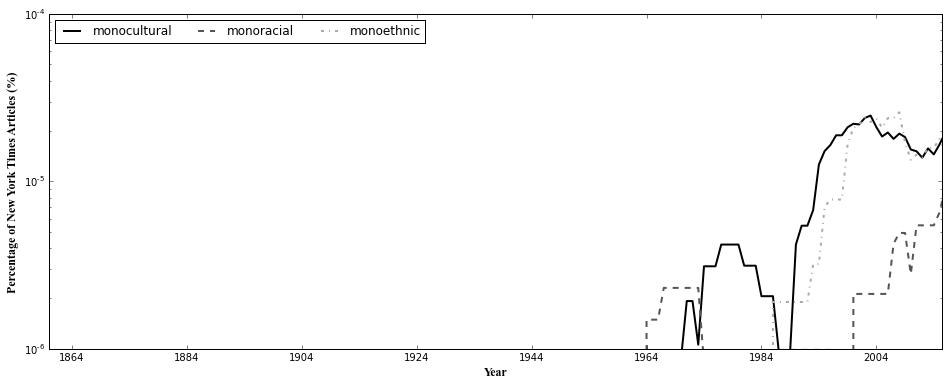

In [170]:
#Figure 1 
words = ["monocultural", "monoracial", "monoethnic"]
plot(data,words,10)

//anaconda/lib/python3.5/site-packages/matplotlib/scale.py:100: RuntimeWarning: invalid value encountered in less_equal
  a[a <= 0.0] = 1e-300


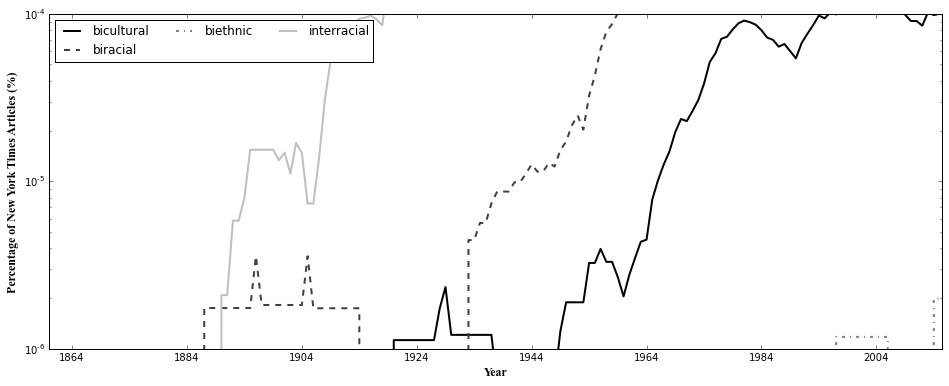

In [171]:
#Figure 2
words = ["bicultural", "biracial", "biethnic", "interracial"]
plot(data,words,10)

//anaconda/lib/python3.5/site-packages/matplotlib/scale.py:100: RuntimeWarning: invalid value encountered in less_equal
  a[a <= 0.0] = 1e-300


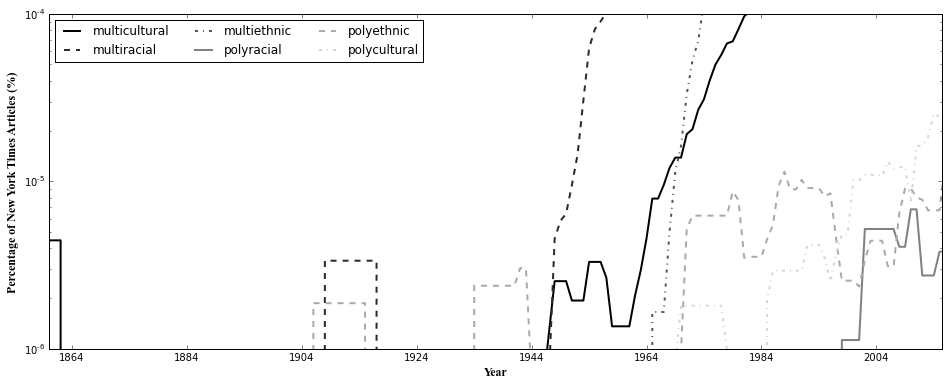

In [172]:
#Figure 3
words = ["multicultural", "multiracial", "multiethnic", 
         "polyracial", "polyethnic", "polycultural"]
plot(data,words,10)

//anaconda/lib/python3.5/site-packages/matplotlib/scale.py:100: RuntimeWarning: invalid value encountered in less_equal
  a[a <= 0.0] = 1e-300


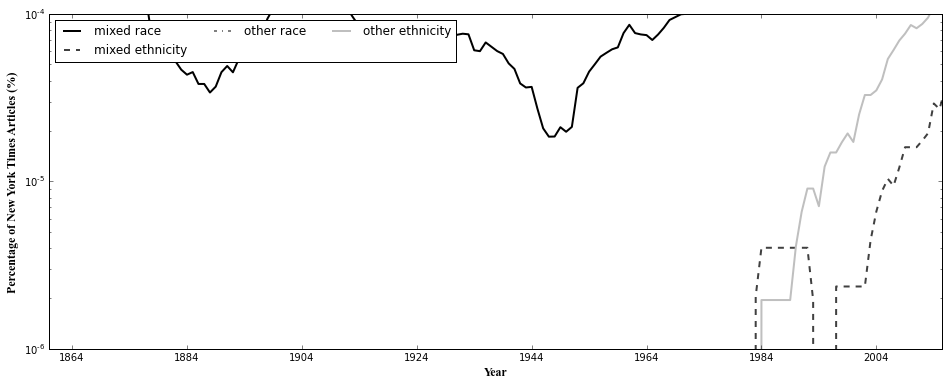

In [173]:
#Figure 4
words = ["mixed race", "mixed ethnicity", "other race", "other ethnicity"]
plot(data,words,10)

//anaconda/lib/python3.5/site-packages/matplotlib/scale.py:100: RuntimeWarning: invalid value encountered in less_equal
  a[a <= 0.0] = 1e-300


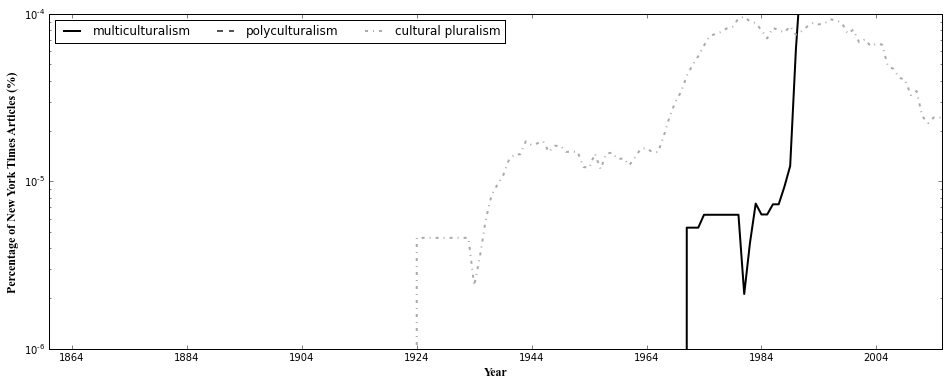

In [174]:
#Figure 5
words = ["multiculturalism", "polyculturalism", "cultural pluralism"]
plot(data,words,10)

//anaconda/lib/python3.5/site-packages/matplotlib/scale.py:100: RuntimeWarning: invalid value encountered in less_equal
  a[a <= 0.0] = 1e-300


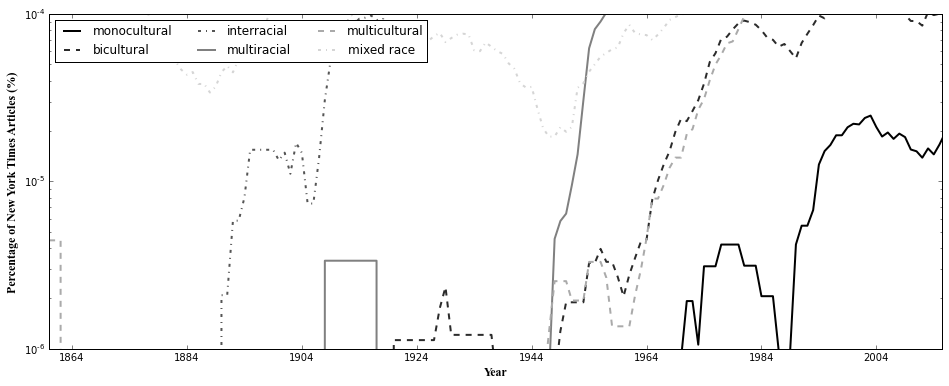

In [175]:
#Figure 6
words = ["monocultural", "bicultural", "interracial", 
         "multiracial", "multicultural", "mixed race"]
plot(data,words,10)

# Old Plots

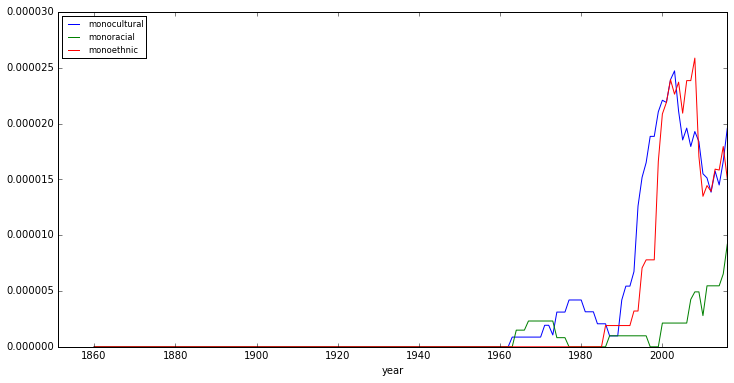

In [99]:
#Figure 1
years_to_average_over = 10
smoothed_data = data[["monocultural", "monoracial", "monoethnic"]].rolling(window=years_to_average_over).mean()
axis = smoothed_data.plot()
fig = plt.gcf()
fig.set_size_inches((12,6))
_ = axis.legend(prop=fontP, loc="best")

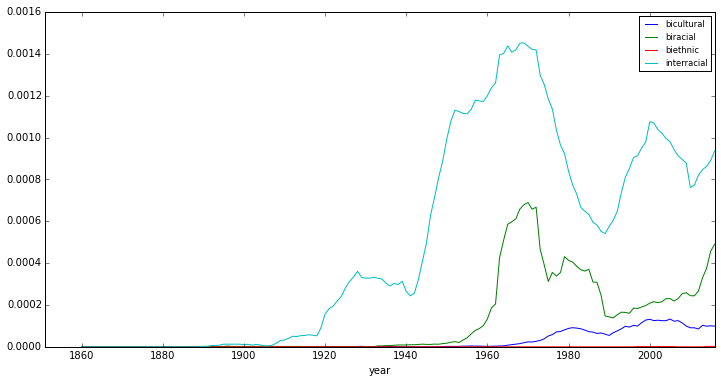

In [65]:
#Figure 2
years_to_average_over = 10
smoothed_data = data[["bicultural", "biracial", "biethnic", "interracial"]].rolling(window=years_to_average_over).mean()
axis = smoothed_data.plot()
fig = plt.gcf()
fig.set_size_inches((12,6))
_ = axis.legend(prop=fontP, loc="best")

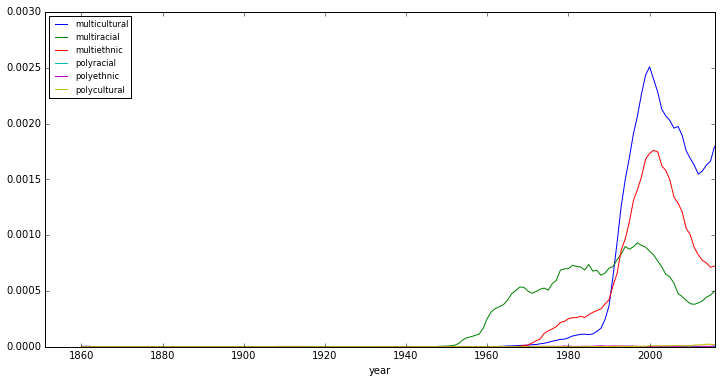

In [66]:
#Figure 3
years_to_average_over = 10
smoothed_data = data[["multicultural", "multiracial", "multiethnic", "polyracial", "polyethnic", "polycultural"]].rolling(window=years_to_average_over).mean()
axis = smoothed_data.plot()
fig = plt.gcf()
fig.set_size_inches((12,6))
_ = axis.legend(prop=fontP, loc="best")

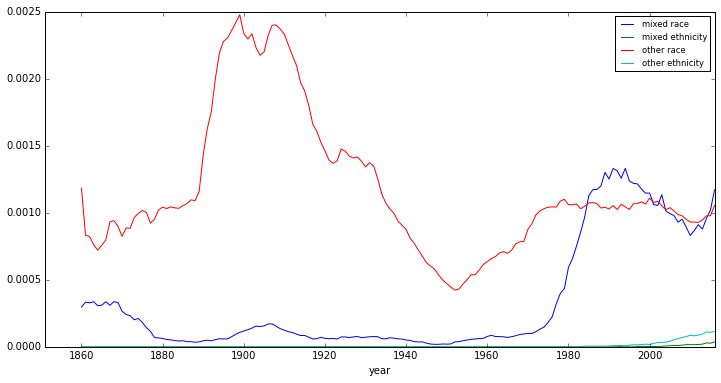

In [67]:
#Figure 4
years_to_average_over = 10
smoothed_data = data[["mixed race", "mixed ethnicity", "other race", "other ethnicity"]].rolling(window=years_to_average_over).mean()
axis = smoothed_data.plot()
fig = plt.gcf()
fig.set_size_inches((12,6))
_ = axis.legend(prop=fontP, loc="best")

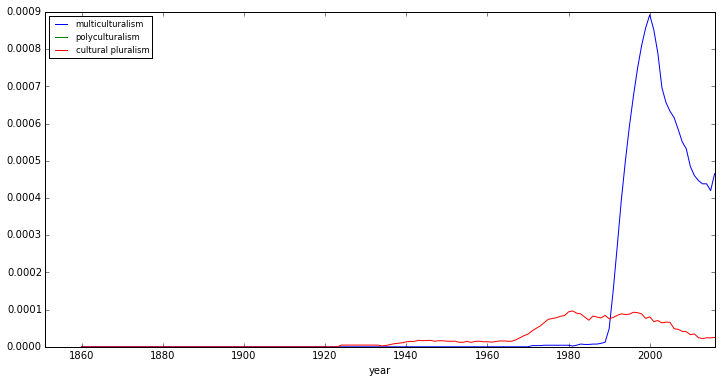

In [68]:
#Figure 5
years_to_average_over = 10
smoothed_data = data[["multiculturalism", "polyculturalism", "cultural pluralism"]].rolling(window=years_to_average_over).mean()
axis = smoothed_data.plot()
fig = plt.gcf()
fig.set_size_inches((12,6))
_ = axis.legend(prop=fontP, loc="best")

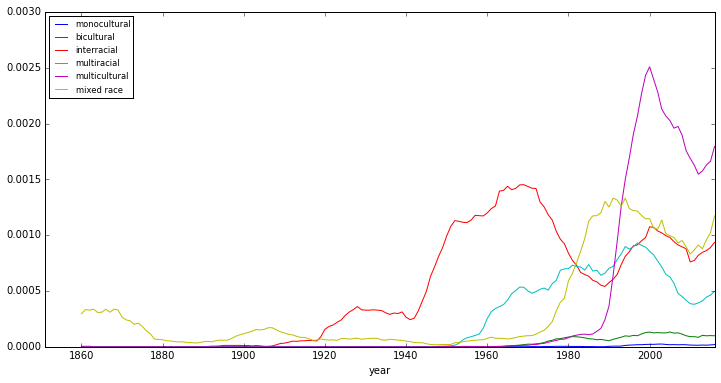

In [98]:
#Figure 6
years_to_average_over = 10
smoothed_data = data[["monocultural", "bicultural", "interracial", "multiracial", "multicultural", "mixed race"]].rolling(window=years_to_average_over).mean()
axis = smoothed_data.plot()
fig = plt.gcf()
fig.set_size_inches((12,6))
_ = axis.legend(prop=fontP, loc="best")